# EDA数据分析

In [1]:
# 输出每个cell的运行时间
%load_ext autotime
# https://github.com/cpcloud/ipython-autotime
import sys
import warnings
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore")

sys.path.append('../')

from utils import scan_files,load_file

root_path = "../data/round1/train/"

## 篇章个数统计

In [2]:
file_names = scan_files(root_path)
print("共计有文章：{}篇".format(len(file_names)))

共计有文章：363篇
time: 8 ms


## 篇章长度统计

最大值：21504
最小值：600
平均值：8831.338842975207
中位数:8344.0


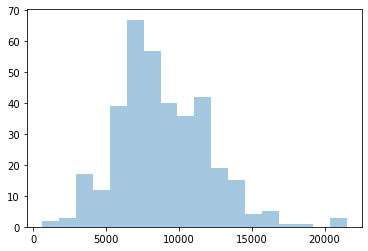

time: 290 ms


In [3]:
file_data = []
for name in file_names:
    file_data.append(load_file(root_path,name))
file_data_len = [len(x) for x in file_data]
print("最大值：{}\n最小值：{}\n平均值：{}\n中位数:{}".format(np.max(file_data_len),np.min(file_data_len),np.mean(file_data_len),np.median(file_data_len)))
sns.distplot(file_data_len,kde=False)

In [4]:
from preprocess import DataSet
dataset = DataSet(root_path,file_names)

time: 803 ms


## 篇章中包含的实体个数统计

全部实体个数为：140028
最大值：1248
最小值：22
平均值：385.75206611570246
中位数:367.0


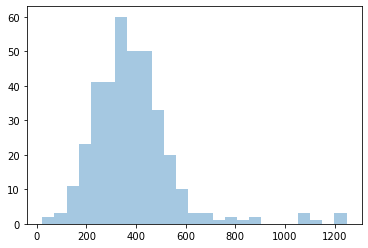

time: 205 ms


In [5]:
entities_counts = []
for doc in dataset.docs:
    entities_counts.append(len(doc.entities.get_all()))
total_count = 0
for c in entities_counts:
    total_count += c
print("全部实体个数为：{}".format(total_count))
print("最大值：{}\n最小值：{}\n平均值：{}\n中位数:{}".format(np.max(entities_counts),np.min(entities_counts),np.mean(entities_counts),np.median(entities_counts)))
sns.distplot(entities_counts,kde=False)

## 关系实例数量统计

In [6]:
root_path = "../data/round2/"
file_names = scan_files(root_path)
dataset = DataSet(root_path, file_names)

time: 184 ms


50篇文章中有12066个关系实例
实例数量/篇 统计特征如下：
最大值：797
最小值：3
平均值：248.44
中位数:213.5
实例数量分布如下：


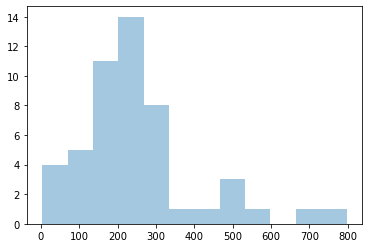

time: 208 ms


In [7]:
distance_list = []
pairs_count_list = []
# doc = dataset.docs[0]
for doc in dataset.docs:
    pairs_list = doc.entity_pairs
    pairs_count_list.append(len(pairs_list))
    for pair in pairs_list:
        e1 = pair.from_ent
        e2 = pair.end_ent
        if e1.end_pos < e2.start_pos:
            distance_list.append(e2.start_pos - e1.end_pos + 1)
        elif e1.start_pos > e2.end_pos:
            distance_list.append(e1.start_pos - e2.end_pos + 1)
print("{}篇文章中有{}个关系实例".format(len(file_names),len(distance_list)))
print("实例数量/篇 统计特征如下：")
print("最大值：{}\n最小值：{}\n平均值：{}\n中位数:{}".format(np.max(pairs_count_list),np.min(pairs_count_list),np.mean(pairs_count_list),np.median(pairs_count_list)))
print("实例数量分布如下：")
sns.distplot(pairs_count_list,kde=False,bins=12)

## 关系间的距离统计

In [8]:
print("最大值：{}\n最小值：{}\n平均值：{}\n中位数:{}".format(np.max(distance_list),np.min(distance_list),np.mean(distance_list),np.median(distance_list)))
k = 96.7
print("取{}分位数的值为：{}".format(k,np.percentile(distance_list,k)))

最大值：12383
最小值：2
平均值：71.35728493286922
中位数:27.0
取96.7分位数的值为：165.0
time: 9 ms


关系间的距离-数量分布如下：


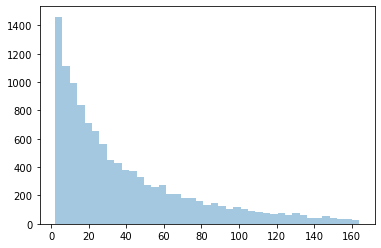

time: 231 ms


In [9]:
distance_list_cut = [value for value in distance_list if value < 165]
print("关系间的距离-数量分布如下：")
sns.distplot(distance_list_cut,kde=False)